## Car Brand Classification

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

/home/rahul0324/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahul0324/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahul0324/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahul0324/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [23]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [24]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [25]:
resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [26]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [27]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [30]:

# view the structure of the model
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [31]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [33]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [35]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [36]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
2/2 [==============================] - 20s 10s/step - loss: 4.8905 - acc: 0.3125 - val_loss: 8.8582 - val_acc: 0.3276
Epoch 2/50
2/2 [==============================] - 25s 13s/step - loss: 8.0926 - acc: 0.4375 - val_loss: 9.6530 - val_acc: 0.3276
Epoch 3/50
2/2 [==============================] - 33s 16s/step - loss: 6.6553 - acc: 0.5781 - val_loss: 10.9262 - val_acc: 0.3276
Epoch 4/50
2/2 [==============================] - 35s 17s/step - loss: 4.9672 - acc: 0.6562 - val_loss: 10.8681 - val_acc: 0.3276
Epoch 5/50
2/2 [==============================] - 25s 12s/step - loss: 4.9926 - acc: 0.6719 - val_loss: 10.8681 - val_acc: 0.3276
Epoch 6/50
2/2 [==============================] - 19s 9s/step - loss: 5.7243 - acc: 0.5938 - val_loss: 10.9843 - val_acc: 0.3276
Epoch 7/50
2/2 [==============================] - 20s 10s/step - loss: 5.2949 - acc: 0.6562 - val_loss: 10.9262 - val_acc: 0.3276
Epoch 8/50
2/2 [=============================

Epoch 39/50
2/2 [==============================] - 20s 10s/step - loss: 4.7851 - acc: 0.7031 - val_loss: 10.8100 - val_acc: 0.3276
Epoch 40/50
2/2 [==============================] - 19s 10s/step - loss: 4.7851 - acc: 0.7031 - val_loss: 10.8100 - val_acc: 0.3276
Epoch 41/50
2/2 [==============================] - 19s 10s/step - loss: 4.5332 - acc: 0.7188 - val_loss: 10.8681 - val_acc: 0.3276
Epoch 42/50
2/2 [==============================] - 19s 10s/step - loss: 4.7851 - acc: 0.7031 - val_loss: 10.9843 - val_acc: 0.3276
Epoch 43/50
2/2 [==============================] - 20s 10s/step - loss: 4.5332 - acc: 0.7188 - val_loss: 10.6356 - val_acc: 0.3276
Epoch 44/50
2/2 [==============================] - 20s 10s/step - loss: 4.7851 - acc: 0.7031 - val_loss: 10.6937 - val_acc: 0.3276
Epoch 45/50
2/2 [==============================] - 19s 10s/step - loss: 4.7851 - acc: 0.7031 - val_loss: 10.8681 - val_acc: 0.3276
Epoch 46/50
2/2 [==============================] - 19s 10s/step - loss: 4.7851 - ac

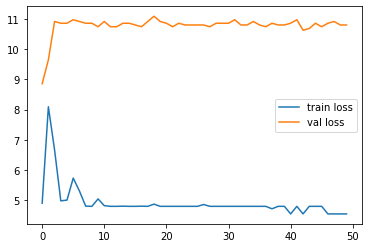

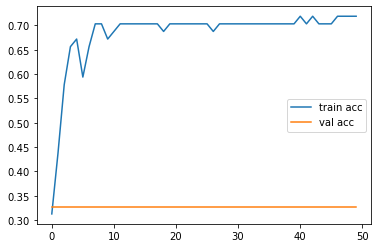

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [45]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [46]:

y_pred = model.predict(test_set)


In [47]:
y_pred

array([[1.9183304e-22, 0.0000000e+00, 1.0000000e+00],
       [5.3839063e-23, 0.0000000e+00, 1.0000000e+00],
       [2.4716090e-22, 0.0000000e+00, 1.0000000e+00],
       [4.1007242e-22, 0.0000000e+00, 1.0000000e+00],
       [1.9583545e-21, 9.0093323e-38, 1.0000000e+00],
       [2.8754642e-21, 3.9397186e-37, 1.0000000e+00],
       [1.7820821e-21, 5.6913563e-38, 1.0000000e+00],
       [7.5381004e-22, 0.0000000e+00, 1.0000000e+00],
       [4.6160061e-22, 0.0000000e+00, 1.0000000e+00],
       [2.3415379e-21, 1.3254018e-37, 1.0000000e+00],
       [4.2995883e-22, 0.0000000e+00, 1.0000000e+00],
       [6.5754497e-22, 0.0000000e+00, 1.0000000e+00],
       [3.0487482e-22, 0.0000000e+00, 1.0000000e+00],
       [2.2465229e-22, 0.0000000e+00, 1.0000000e+00],
       [2.9926799e-21, 1.0614131e-37, 1.0000000e+00],
       [1.3037892e-21, 1.5496108e-37, 1.0000000e+00],
       [7.8855298e-22, 0.0000000e+00, 1.0000000e+00],
       [1.5715486e-21, 5.7673695e-38, 1.0000000e+00],
       [3.8956636e-21, 3.822

In [48]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [49]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [51]:
model=load_model('model_resnet50.h5')

In [68]:
img=image.load_img('Datasets/test/lamborghini/11.jpg',target_size=(224,224))



In [69]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [70]:
x.shape

(224, 224, 3)

In [71]:
x=x/255

In [72]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [73]:
model.predict(img_data)

array([[8.5362555e-13, 2.6426788e-32, 1.0000000e+00]], dtype=float32)

In [74]:
a=np.argmax(model.predict(img_data), axis=1)

In [75]:
a

array([2])